## ***LES EXECUTIONS DES GRAPHIQUES PEUVENT ÊTRES ASSEZ LONGUES***

#  1 - **CLASSIFICATION **
**DATASET : BREAST CANCER**

---

PARAMETRES 

-------------------------------------------------------------------------

n_estimators

max_depth

min_sample_split

min_sample_leaf

max_leaf_nodes

max_sample (bootstrap sample)

max_features


--------------------------------------------------------------------------

In [1]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import statistics
import matplotlib.pyplot as plt
import pandas as pd
dataset = datasets.load_breast_cancer()
X = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
y = dataset.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify = y, test_size = 0.2)

## ------------------- PARAMÈTRE 1 : **N_ESTIMATORS** -----------------------------



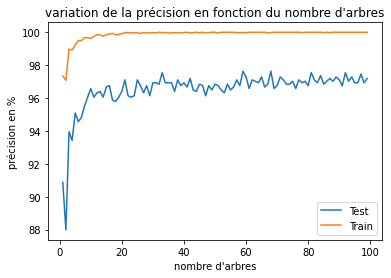

In [11]:
precisions_test=dict()
precisions_train=dict()
i = 1
while i<100:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestClassifier(n_estimators=i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+1

precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision en fonction du nombre d'arbres")
plt.xlabel("nombre d'arbres")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

## Recherche précise du meilleur nombre d'arbres

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'n_estimators' : np.arange(1,100)}
grid = GridSearchCV(RandomForestClassifier(),param_grid, cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 93}

meilleur nombre d'arbres = 35

## ------------------- PARAMÈTRE 2 : **MAX_DEPTH** -----------------------------




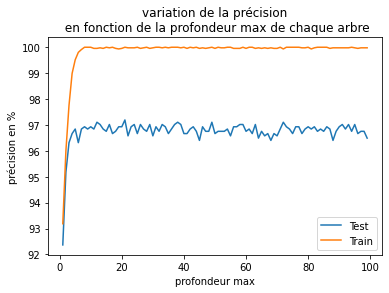

In [ ]:
precisions_test=dict()
precisions_train=dict()
i = 1
while i<100:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestClassifier(n_estimators = 35, max_depth = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+1
  
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision\n en fonction de la profondeur max de chaque arbre")
plt.xlabel("profondeur max")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

In [ ]:
param_grid = {'max_depth' : np.arange(1,100)}
grid = GridSearchCV(RandomForestClassifier(),param_grid, cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 62}

meilleure profondeur = 62

## ------------------- PARAMÈTRE 3 : **MIN SAMPLES SPLIT** -----------------------------

In [ ]:
X_train['mean area'].count()

455

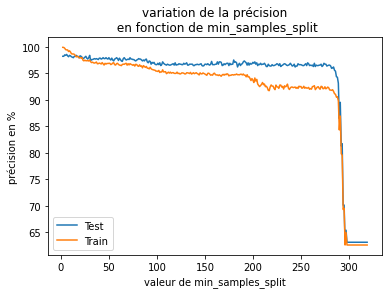

In [ ]:
precisions_test=dict()
precisions_train=dict()
i = 2
while i<320:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestClassifier(n_estimators = 35, max_depth = 62, min_samples_split = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+1
  
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision\n en fonction de min_samples_split")
plt.xlabel("valeur de min_samples_split")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

meilleur valeur de min_samples_split = 2 (valeur par défault minimum, en dessous on voit bien sur le graph que la précision descend)



## ------------------- PARAMÈTRE 4 : **MIN SAMPLES LEAF** -----------------------------



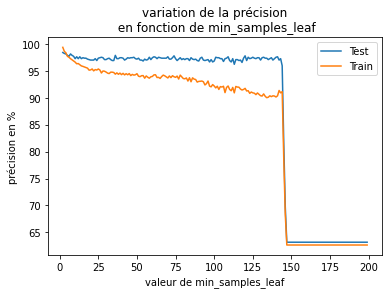

In [ ]:
precisions_test=dict()
precisions_train=dict()
i = 2
while i<200:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestClassifier(n_estimators = 35, max_depth = 62, min_samples_leaf = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+1
  
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision\n en fonction de min_samples_leaf")
plt.xlabel("valeur de min_samples_leaf")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

on va garder la valeur par défault car min sample leaf ne fais que décroitre.

## ------------------- PARAMÈTRE 4 : **MAX LEAF NODE** -----------------------------


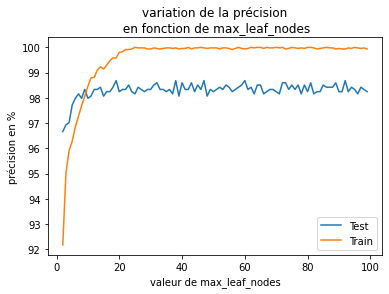

In [ ]:
precisions_test=dict()
precisions_train=dict()
i = 2
while i<100:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestClassifier(n_estimators = 35, max_depth = 62, max_leaf_nodes = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+1
  
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision\n en fonction de max_leaf_nodes")
plt.xlabel("valeur de max_leaf_nodes")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

## ------------------- PARAMÈTRE 4 : **MAX SAMPLES** -----------------------------

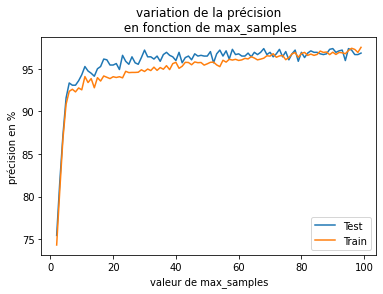

In [ ]:
precisions_test=dict()
precisions_train=dict()
i = 2
while i<100:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestClassifier(n_estimators = 35, max_depth = 62, max_leaf_nodes = 50, max_samples = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+1
  
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision\n en fonction de max_samples")
plt.xlabel("valeur de max_samples")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

## ------------------- PARAMÈTRE 4 : **MAX FEATURES** -----------------------------

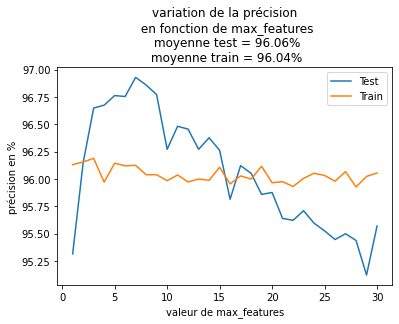

In [ ]:
precisions_test=dict()
precisions_train=dict()
i = 1
while i<31:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(100):
    algo = RandomForestClassifier(n_estimators = 35, max_depth = 62, max_leaf_nodes = 50, max_samples = 60, max_features = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+1
  
moy_test = statistics.mean(precisions_test.values())
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

moy_train = statistics.mean(precisions_train.values())
precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title(f"variation de la précision\n en fonction de max_features\n moyenne test = {moy_test:.2f}%\n moyenne train = {moy_train:.2f}%")
plt.xlabel("valeur de max_features")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

## ------------------- PARAMÈTRE 4 : **MIN WEIGHT FRACTION LEAF** -----------------------------

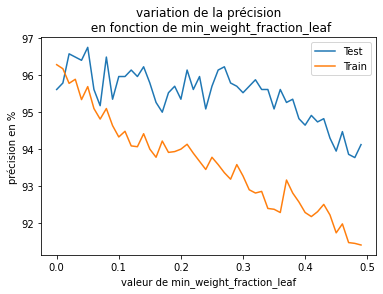

In [13]:
precisions_test=dict()
precisions_train=dict()
i = 0
while i<0.5:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestClassifier(n_estimators = 35, max_depth = 62, max_leaf_nodes = 50, max_samples = 60, min_weight_fraction_leaf = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+0.01
  
moy_test = statistics.mean(precisions_test.values())
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

moy_train = statistics.mean(precisions_train.values())
precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title(f"variation de la précision\n en fonction de min_weight_fraction_leaf")
plt.xlabel("valeur de min_weight_fraction_leaf")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

## ------------------- PARAMÈTRE 4 : **MIN IMPURITY DECREASE** -----------------------------

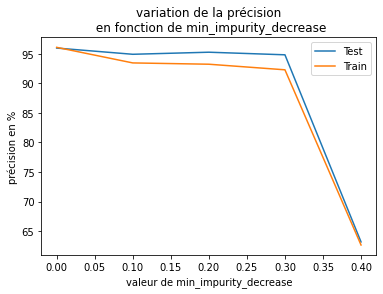

In [14]:
precisions_test=dict()
precisions_train=dict()
i = 0
while i<0.5:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestClassifier(n_estimators = 35, max_depth = 62, max_leaf_nodes = 50, max_samples = 60, min_impurity_decrease = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  i = i+0.1
  
moy_test = statistics.mean(precisions_test.values())
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

moy_train = statistics.mean(precisions_train.values())
precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title(f"variation de la précision\n en fonction de min_impurity_decrease")
plt.xlabel("valeur de min_impurity_decrease")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()